## Install Sentinel-Hub

In [ ]:
pip install sentinelhub --upgrade

     |████████████████████████████████| 194kB 5.8MB/s 
     |████████████████████████████████| 133kB 7.5MB/s 
     |████████████████████████████████| 7.2MB 7.5MB/s 
     |████████████████████████████████| 6.5MB 49.9MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Created wheel for sentinelhub: filename=sentinelhub-3.1.0-cp36-none-any.whl size=196404 sha256=854c0f58400fec48b8e5520d7d2708ba05d0a6f4f6655dc3d6bd28827894d62f
  Stored in directory: /root/.cache/pip/wheels/90/6c/df/be1525ead52f5c2ce49f0880e73587723bf25caac7295f9db2
  Created wheel for utm: filename=utm-0.7.0-cp36-none-any.whl size=6094 sha256=9d8f3cb57e3465448eceea8e70f9596ab494c615b36265127bcdb9d08e2b40c8
  Stored in directory: /root/.cache/pip/wheels/d3/a0/c4/93c7535fe705e70d2376505fd2683f91524a50a944a15212d9
Successfully built sentinelhub utm
ERROR: botocore 1.19.57 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Put the path to the folder where we want to save the files from Sentinelhub

In [ ]:
rootPath="/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/"


In [ ]:
from sentinelhub import SHConfig


INSTANCE_ID = '82f77578-eb9a-4909-9a28-30f5279ba6a3'  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None

#### Imports 

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Import the Libraries

In [ ]:
# Please, install all the neccesary libs.
import datetime
import numpy as np

import matplotlib.pyplot as plt
import os 
import json 

In [ ]:
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, DataCollection

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

### Definir el numero del campo de Talca:

In [ ]:
num_campo=1
talca_campo='campo1'

#num_campo=2
#talca_campo='campo2'

In [ ]:
if num_campo==1:
  talca_coords_wgs84 = [-71.817933, -35.452880, -71.807166, -35.446550] #TALCA coordinates 1st PART (Parte izquierda del terreno)
else:
  talca_coords_wgs84 = [-71.800228, -35.457577, -71.786453, -35.449821] #TALCA coordinates 2nd PART (Parte derecha del terreno)

#FORMAT(LONGITUDE1, LATITUDE1, LONGITUDE2, LATITUDE2) From Google Earth they are lower left and upper rigth corners 

In [ ]:
talca_bbox = BBox(bbox=talca_coords_wgs84, crs=CRS.WGS84)

Since data has been already downloaded the next request will read the data from disk instead of downloading it. That will be much faster.

In [ ]:
wms_bands_request_from_disk = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L1C,
    data_folder=rootPath,
    layer='BANDS-S2-L1C',
    bbox=talca_bbox,
    time=('2016-01-01','2016-12-31'),
    #time='2017-01-29',
    width=600,
    image_format=MimeType.TIFF,
    time_difference=datetime.timedelta(hours=2),
    config=config
)

In [ ]:
name='campo2'
print(name[:6])

campo2


In [ ]:
#A list to save the image names and another one to the folders names
image_names=[]
folder_paths=[]

for folder, _, filenames in os.walk(wms_bands_request_from_disk.data_folder):
    for filename in filenames:
        if filename[-1] != 'n':
          if filename[:6]==talca_campo:
            image_names.append(filename)
            folder_paths.append(folder)
            print(os.path.join(folder, filename))

image_names.sort()
folder_paths.sort()
print(image_names)
print("-----------------")
print(folder_paths)
print("-----------------")
print(len(image_names))
print("-----------------")
print(len(folder_paths))


/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-06-13/campo1_2016-06-13.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-04-04/campo1_2016-04-04.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-03-05/campo1_2016-03-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-05-24/campo1_2016-05-24.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-02-04/campo1_2016-02-04.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-07-23/campo1_2016-07-23.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-05-04/campo1_2016-05-04.tiff
/content/gdrive/My Drive

In [ ]:
wms_bands_img_from_disk = wms_bands_request_from_disk.get_data()
print(type(wms_bands_img_from_disk))
print(len(wms_bands_img_from_disk))
print("===================================================================")
print('These %d images were taken on the following dates:' % len(wms_bands_img_from_disk))
for index, date in enumerate(wms_bands_request_from_disk.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

<class 'list'>
18
These 18 images were taken on the following dates:
 - image 0 was taken on 2016-01-05 14:52:57
 - image 1 was taken on 2016-02-04 14:42:56
 - image 2 was taken on 2016-03-05 14:51:55
 - image 3 was taken on 2016-04-04 14:41:37
 - image 4 was taken on 2016-05-04 14:41:36
 - image 5 was taken on 2016-05-24 14:51:40
 - image 6 was taken on 2016-06-13 14:50:55
 - image 7 was taken on 2016-07-03 14:48:53
 - image 8 was taken on 2016-07-23 14:49:33
 - image 9 was taken on 2016-08-12 14:49:22
 - image 10 was taken on 2016-09-01 14:49:26
 - image 11 was taken on 2016-09-21 14:49:46
 - image 12 was taken on 2016-10-11 14:49:22
 - image 13 was taken on 2016-10-31 14:48:10
 - image 14 was taken on 2016-11-10 14:52:12
 - image 15 was taken on 2016-11-30 14:52:15
 - image 16 was taken on 2016-12-10 14:45:55
 - image 17 was taken on 2016-12-20 14:51:31


In [ ]:
#Verificar si el orden del nombre de las carpetas por fecha coincide con el orden de las fotografias leidas del disk. 
dates=[]
for index, date in enumerate(wms_bands_request_from_disk.get_dates()):
    dates.append(str(date))
#print(dates)

dates_final=[]
for i in range(len(dates)):
  dates_final.append(dates[i][:10])
print(dates_final)

dates_folder=[]
for i in range(len(image_names)):
  dates_folder.append(image_names[i][7:17])

print(dates_folder)

if(dates_final==dates_folder):
  print("LAS FECHAS ESTAN BIEN")
else:
  print("LAS FECHAS ESTAN MAL")

['2016-01-05', '2016-02-04', '2016-03-05', '2016-04-04', '2016-05-04', '2016-05-24', '2016-06-13', '2016-07-03', '2016-07-23', '2016-08-12', '2016-09-01', '2016-09-21', '2016-10-11', '2016-10-31', '2016-11-10', '2016-11-30', '2016-12-10', '2016-12-20']
['2016-01-05', '2016-02-04', '2016-03-05', '2016-04-04', '2016-05-04', '2016-05-24', '2016-06-13', '2016-07-03', '2016-07-23', '2016-08-12', '2016-09-01', '2016-09-21', '2016-10-11', '2016-10-31', '2016-11-10', '2016-11-30', '2016-12-10', '2016-12-20']
LAS FECHAS ESTAN BIEN


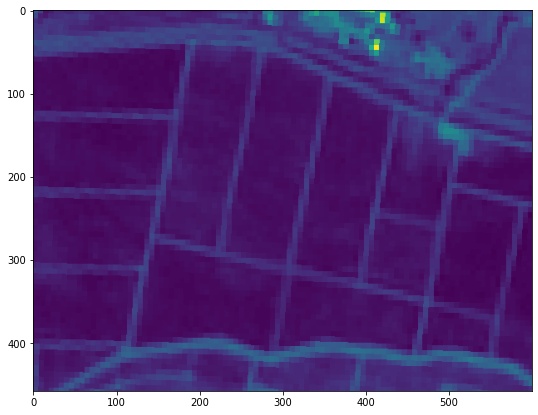

In [ ]:
plot_image(wms_bands_img_from_disk[0][:, :, 1])

## Comprobar que cada uno de los canales RGB al formar la imagen coincidan con la imagen original. (Antes de guardar las imágenes por canales).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


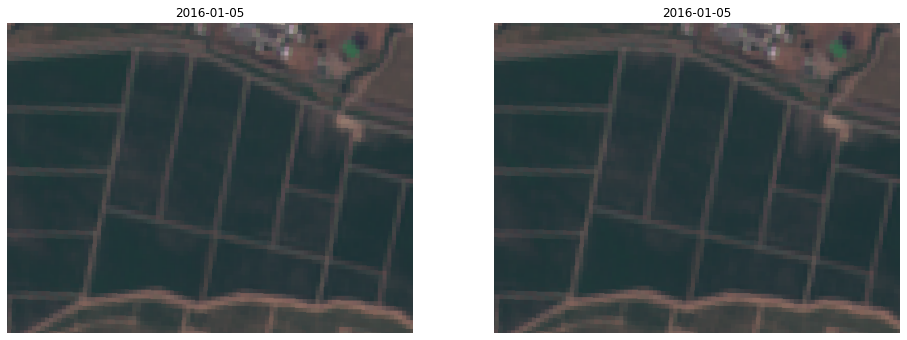

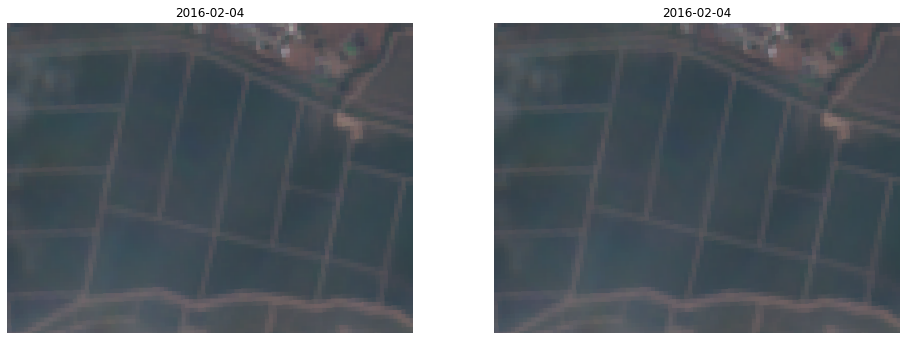

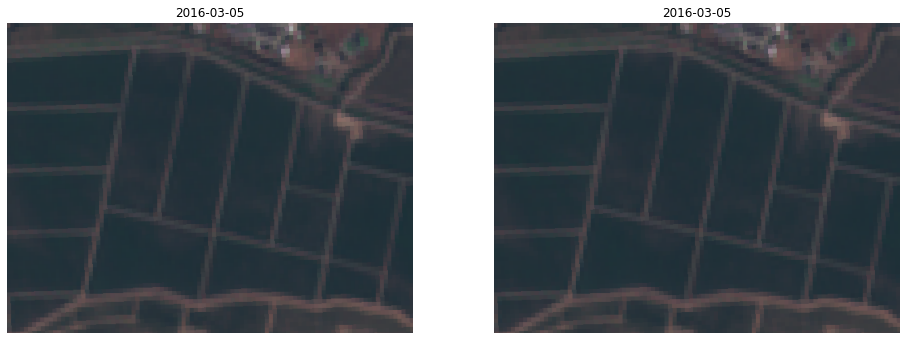

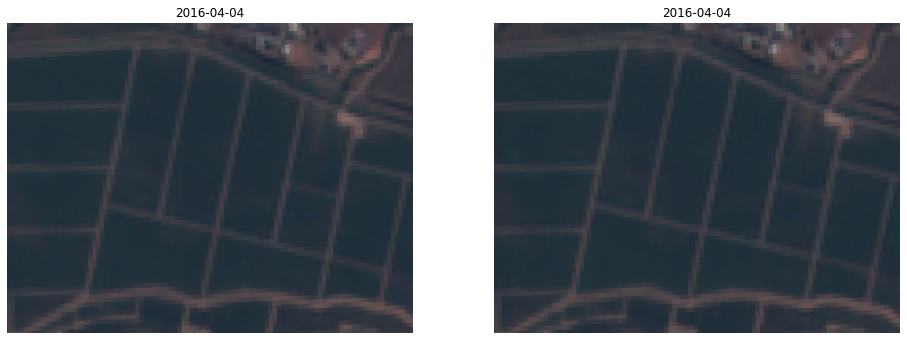

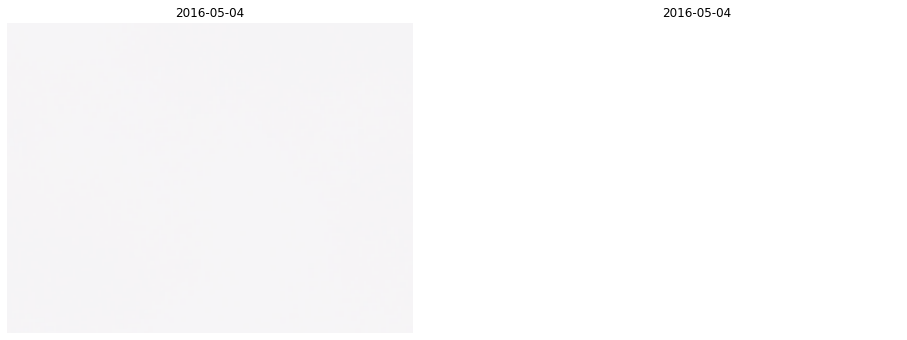

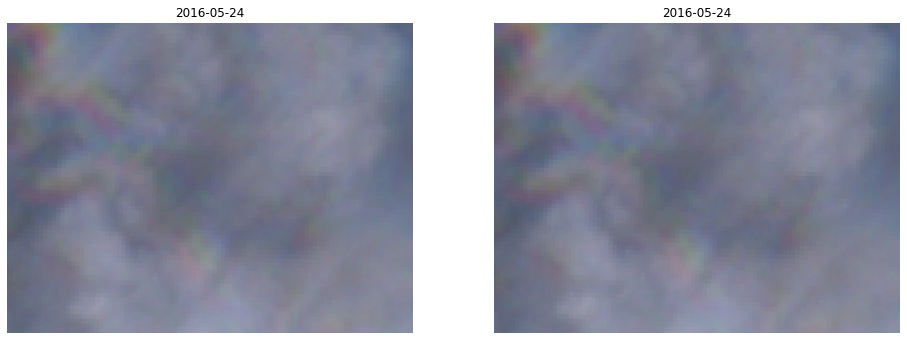

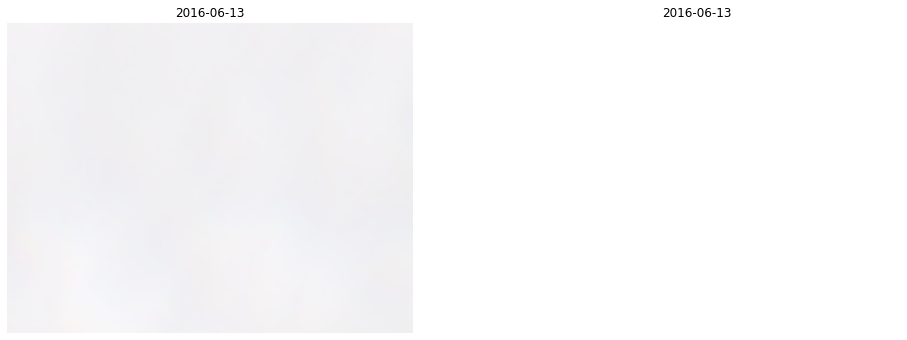

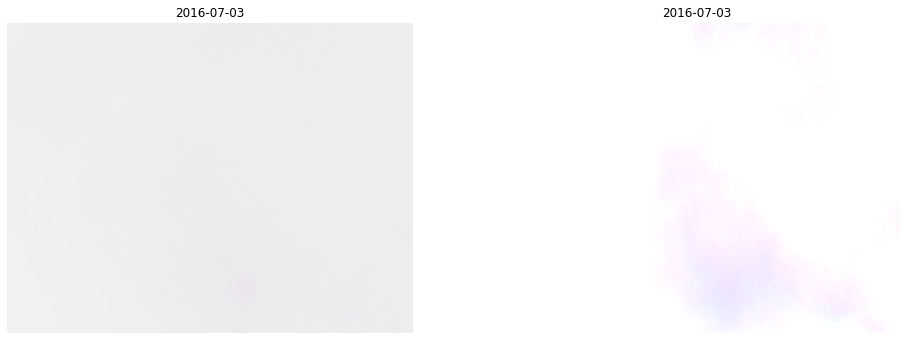

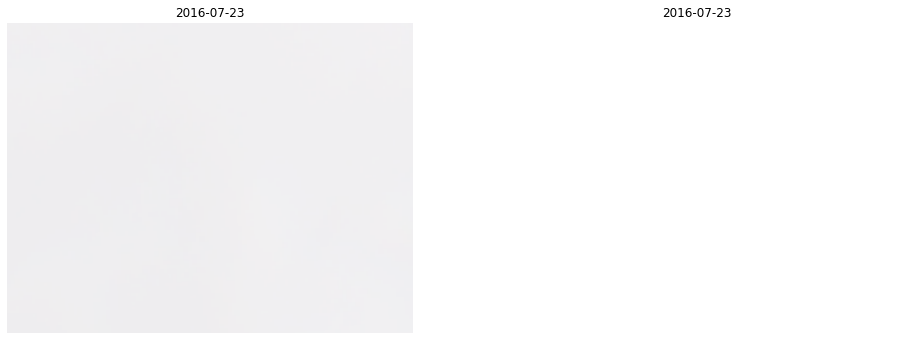

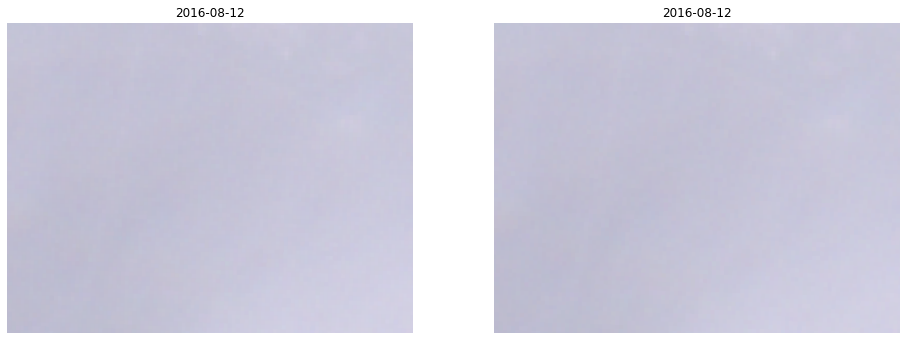

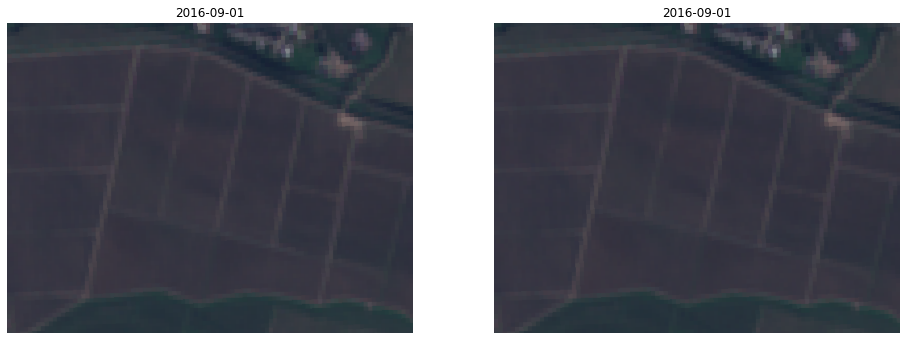

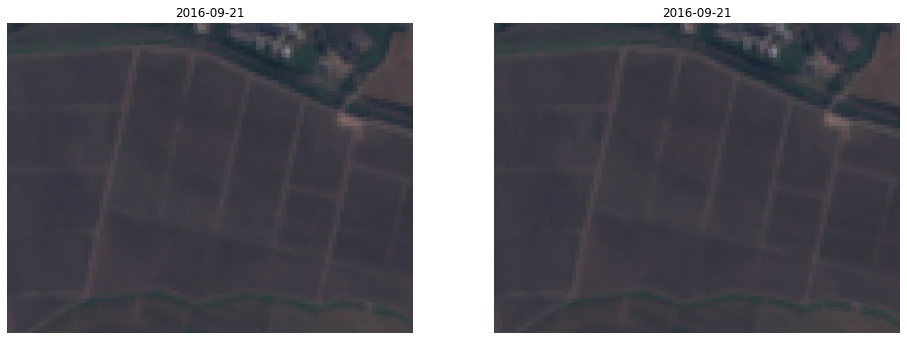

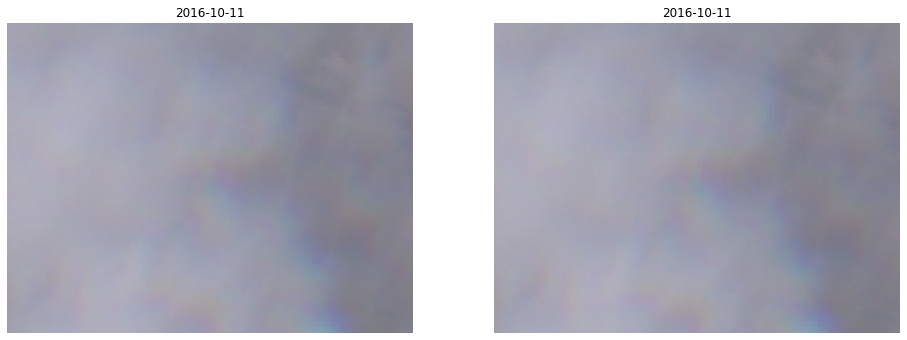

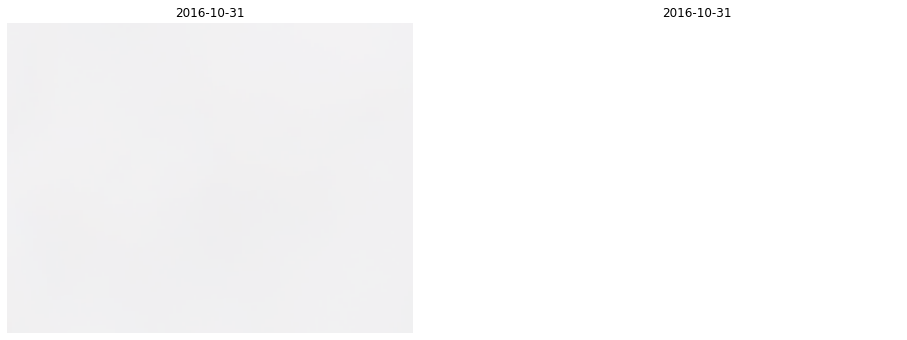

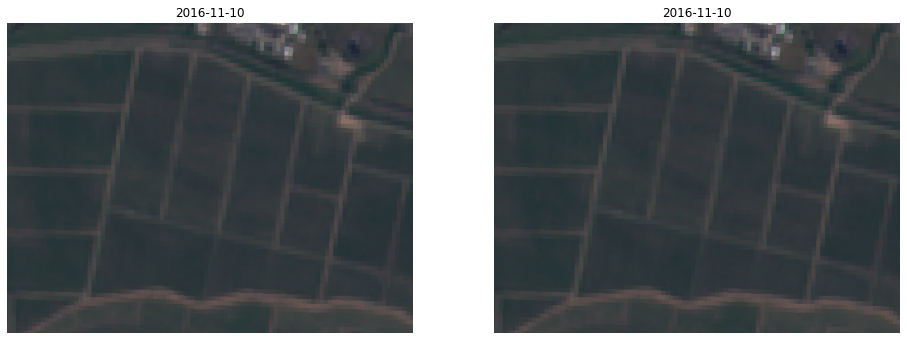

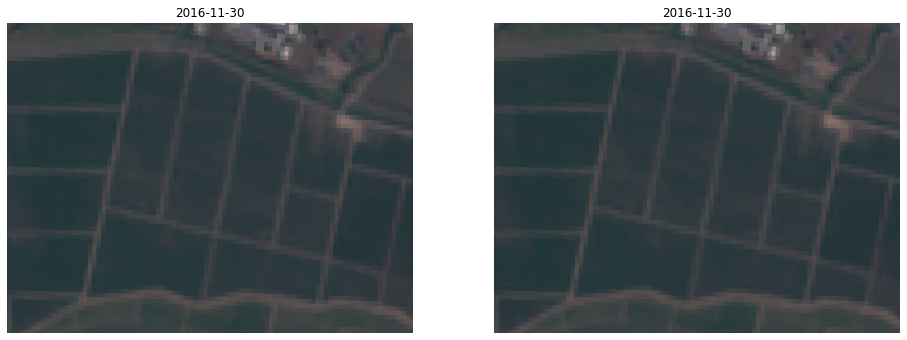

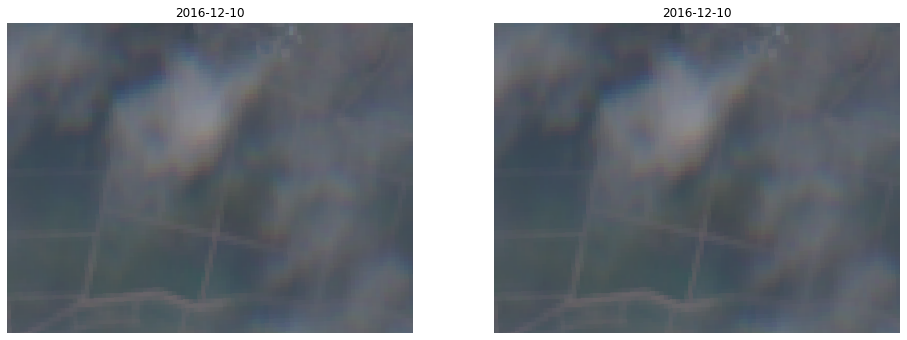

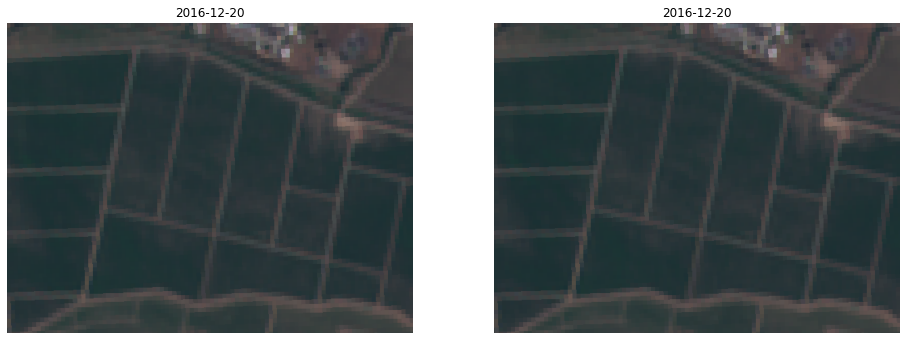

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import datetime
import numpy as np

import matplotlib.pyplot as plt
import os 
import json 

import cv2
import subprocess
import tifffile as tiff
from google.colab.patches import cv2_imshow

imagePlots=[]

for i in range(len(image_names)):
#for i in range(10):
  imagePlots.append(tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/'+talca_campo+'_SentinelL1C_'+dates_final[i]+'/'+talca_campo+'_'+dates_final[i]+'.tiff'))
  #print(imagePlots[0])
  #plt.imshow(imagePlots[0])
  B=wms_bands_img_from_disk[i][:, :, 1] #B
  G=wms_bands_img_from_disk[i][:, :, 2] #G
  R=wms_bands_img_from_disk[i][:, :, 3] #R

  RGB=np.zeros((458,600,3),'float')  #SOLO PARA CAMPO1
  #RGB=np.zeros((438,600,3),'float')   #SOLO PARA CAMPO2
  RGB[...,0]=R*2.5
  RGB[...,1]=G*2.5
  RGB[...,2]=B*2.5

  imagePlots.append(RGB)
  plt.figure(figsize=(16,16))
  for j, img in enumerate(imagePlots):
    plt.subplot(1, 2,j+1)
    plt.axis('off')
    plt.title(dates_final[i])
    plt.imshow(img)
  imagePlots=[]

### Import OpenCV 

In [ ]:
import cv2
import subprocess
import tifffile as tiff
from google.colab.patches import cv2_imshow

### Get one image per channel and then save it

In [ ]:
#Define a list to save the paths to each channel image of every folder
channels_paths=[]
if talca_campo=='campo1':  
  for i in range(len(image_names)):
    for j in range(13):
      img=wms_bands_img_from_disk[i][:, :, j]
      #pathToEachFolder=''
      name="channel"+str(j+1)+"_"+image_names[i]
      path=folder_paths[i]+"/channels"
      mkdircommand=['mkdir', path]
      subprocess.run(mkdircommand).stdout
      channels_paths.append(path+"/"+name)
      cv2.imwrite(path+"/"+name, img )
      print(path+"/"+name)
else:
  for i in range(len(image_names)):
    for j in range(13):
      img=wms_bands_img_from_disk[i][:, :, j]
      #pathToEachFolder=''
      name="channel"+str(j+1)+"_"+image_names[i]
      path=folder_paths[i]+"/channels"
      mkdircommand=['mkdir', path]
      subprocess.run(mkdircommand).stdout
      channels_paths.append(path+"/"+name)
      cv2.imwrite(path+"/"+name, img )
      print(path+"/"+name)

print(channels_paths)

/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel1_campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel2_campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel3_campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel4_campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel5_campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel6_campo1_2016-01-05.tiff
/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/channels/channel7_campo1_2016-01-05.tiff
/content/gdrive/My D

### Define the function to crop the image

In [ ]:
def crop_image(img, path,name, num_campo):
  #Tratar de cropear la imagen
  mask = np.zeros(img.shape[0:2], dtype=np.uint8)
  #points = np.array([[[100,350],[120,400],[310,350],[360,200],[350,20],[25,120]]])
  #points = np.array([[[85,12],[96,442],[623,471],[640,24]]])
  if num_campo == 1:
    points = np.array([[[191,39],[110,412],[221,402],[283,421],[311,315],[394,333],[443,117],[276,38]]]) #Talca first part
  else:
    points = np.array([[[118,22],[93,35],[79,52],[51,85],[233,304],[285,340],[452,380],[569,51]]])  #Talca second part
  #method 1 smooth region
  cv2.drawContours(mask, [points], -1, (255, 255, 255), -1, cv2.LINE_AA)
  #method 2 not so smooth region
  # cv2.fillPoly(mask, points, (255))
  res = cv2.bitwise_and(img,img,mask = mask)
  rect = cv2.boundingRect(points) # returns (x,y,w,h) of the rect
  cropped = res[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
  ## crate the white background of the same size of original image
  wbg = np.ones_like(img, np.uint8)*255
  cv2.bitwise_not(wbg,wbg, mask=mask)
  # overlap the resulted cropped image on the white background
  dst = wbg+res
  #cv2.imshow('Original',img)
  #cv2.imshow("Mask",mask)
  #cv2.imshow("Cropped", cropped )
  #cv2.imwrite("cropped2.tiff", cropped)
  #cv2.imwrite("crop_response.tiff", cropped)
  #cv2.imshow("Samed Size Black Image", res)
  definitive_path=path+"/crop_"+name
  cv2.imwrite(definitive_path, res)
  #cv2.imwrite("crop_black_response.tiff", res)
  #cv2.imshow("Samed Size White Image", dst)
  #cv2.waitKey(0)
  #cv2.destroyAllWindows()

  return definitive_path


In [ ]:
print(len(channels_paths))

234


In [ ]:
print(len(folder_paths))

18


### Crop the images per channel

In [ ]:
#Array to save the paths to the crop images
crop_folders=[]

#make the directories for crop images
for i in range(len(folder_paths)):
  #pathToEachFolder=''
  path=folder_paths[i]+"/crop_channels"
  mkdircommand=['mkdir', path]
  subprocess.run(mkdircommand).stdout
  crop_folders.append(path)
print(crop_folders)

['/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-01-05/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-02-04/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-03-05/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-04-04/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-05-04/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-05-24/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-06-13/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/campo1_SentinelL1C_2016-07-03/crop_channels', '/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/c

In [ ]:
print((channels_paths[1][108:]))
print(type(channels_paths[-1:-33]))
#/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/e67a54e5351acd9bb4c014421fb67895/channels/channel2_campo2_2017-12-10.tiff

channel2_campo1_2016-01-05.tiff
<class 'list'>


In [ ]:
#Crop the images

#Array to save the path to each channel crop
channel_crops=[]
aux=-1
for i in range(len(channels_paths)):
  img=cv2.imread(channels_paths[i],cv2.IMREAD_UNCHANGED)
  print(img)
  if i%13!=0:
    crop_folder=crop_folders[aux]
  else:
    aux+=1
    crop_folder=crop_folders[aux]
  #Call to the function crop_image
  name=channels_paths[i][108:]
  channel_crops.append(crop_image(img,crop_folder,str(name),num_campo))

print(channel_crops)

[[0.1307 0.1307 0.1307 ... 0.1371 0.1371 0.1371]
 [0.1307 0.1307 0.1307 ... 0.1371 0.1371 0.1371]
 [0.1307 0.1307 0.1307 ... 0.1371 0.1371 0.1371]
 ...
 [0.1259 0.1259 0.1259 ... 0.1302 0.1302 0.1302]
 [0.1259 0.1259 0.1259 ... 0.1302 0.1302 0.1302]
 [0.1259 0.1259 0.1259 ... 0.1302 0.1302 0.1302]]
[[0.1357 0.1357 0.1357 ... 0.1144 0.1144 0.1144]
 [0.1357 0.1357 0.1357 ... 0.1144 0.1144 0.1144]
 [0.1357 0.1357 0.1357 ... 0.1328 0.1328 0.1328]
 ...
 [0.1174 0.1174 0.1174 ... 0.1092 0.1092 0.1092]
 [0.1174 0.1174 0.1174 ... 0.1092 0.1092 0.1092]
 [0.1174 0.1174 0.1174 ... 0.1092 0.1092 0.1092]]
[[0.1413 0.1413 0.1413 ... 0.1114 0.1114 0.1114]
 [0.1413 0.1413 0.1413 ... 0.1114 0.1114 0.1114]
 [0.1413 0.1413 0.1413 ... 0.1355 0.1355 0.1355]
 ...
 [0.1159 0.1159 0.1159 ... 0.1173 0.1173 0.1173]
 [0.1159 0.1159 0.1159 ... 0.1173 0.1173 0.1173]
 [0.1159 0.1159 0.1159 ... 0.1173 0.1173 0.1173]]
[[0.1819 0.1819 0.1819 ... 0.1144 0.1144 0.1144]
 [0.1819 0.1819 0.1819 ... 0.1144 0.1144 0.1144]
 [

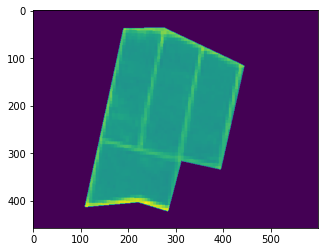

In [ ]:
img_read= tiff.imread(channel_crops[2])
plt.imshow(img_read)

In [ ]:
#Prueba de leer la imagen

#imagen = tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/e67a54e5351acd9bb4c014421fb67895/channels/channel1_campo2_2017-12-10.tiff')
#img=wms_bands_img_from_disk[2][:, :, 2]
#plt.imshow(imagen)

## Comprobar que cada uno de los canales RGB al formar la imagen coincidan con la imagen original. (Despúes de guardar las imágenes por canales).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


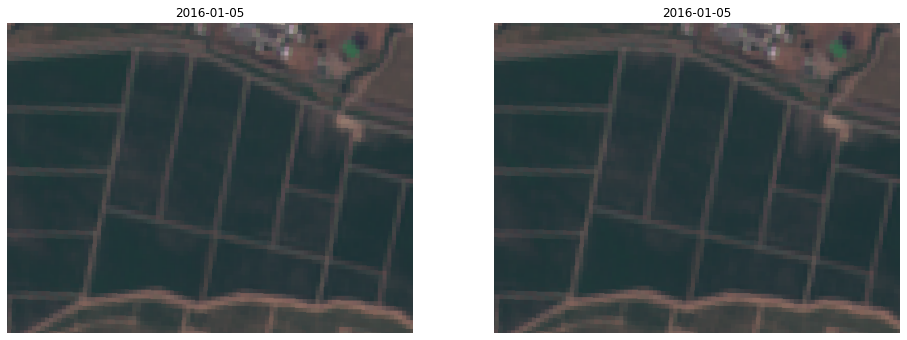

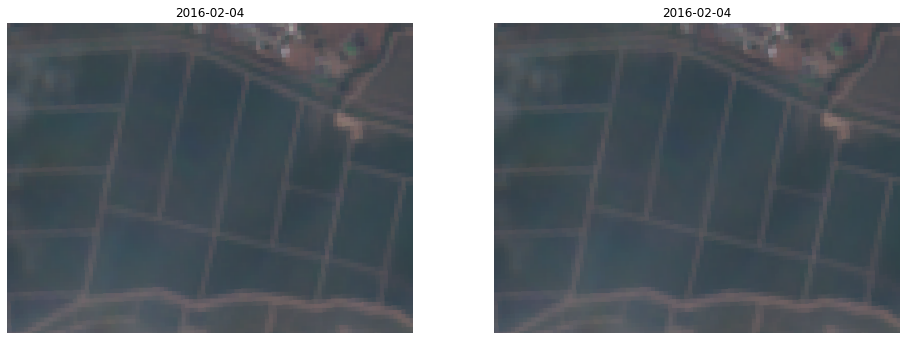

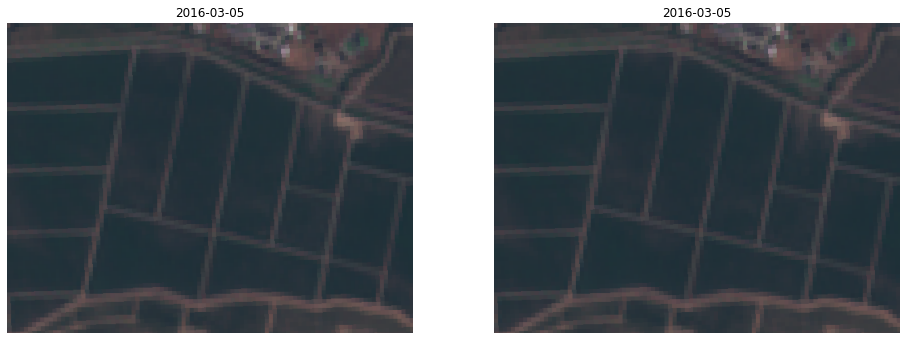

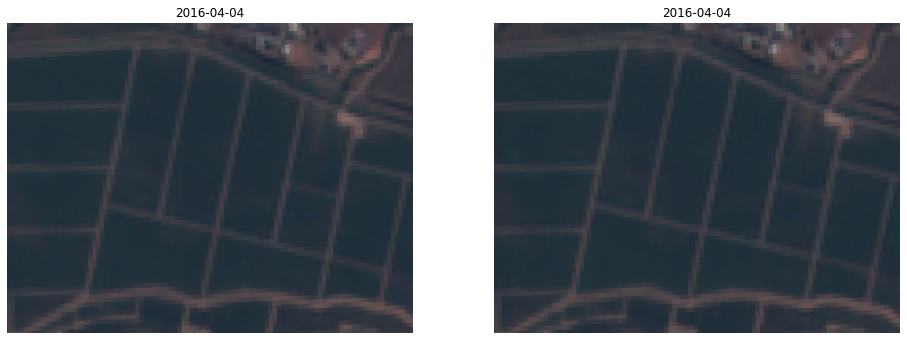

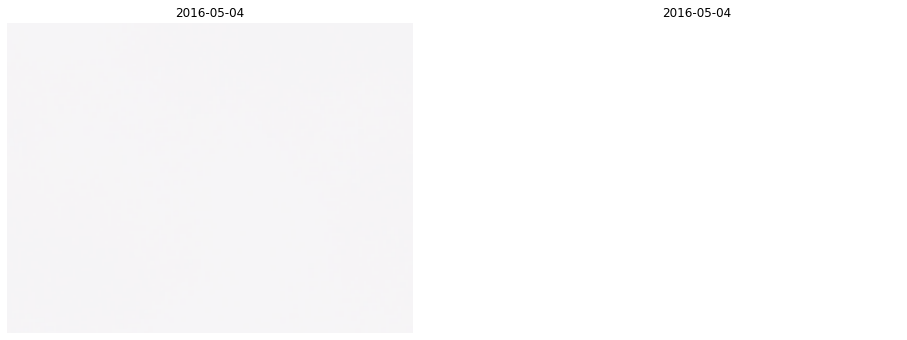

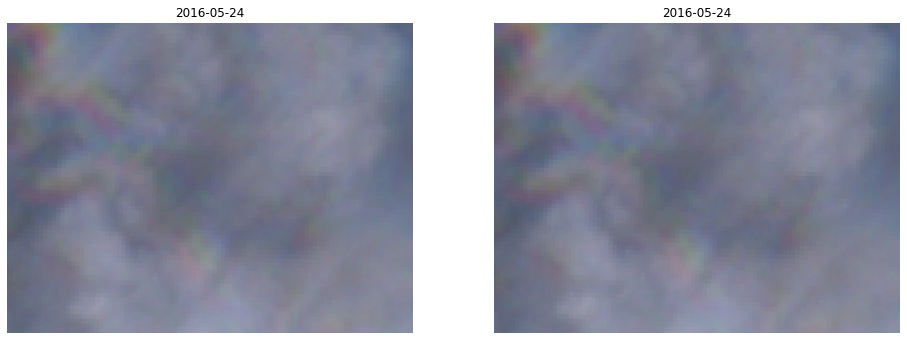

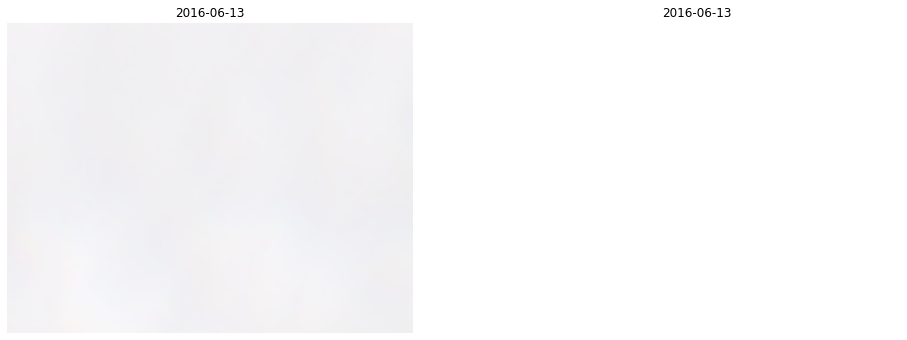

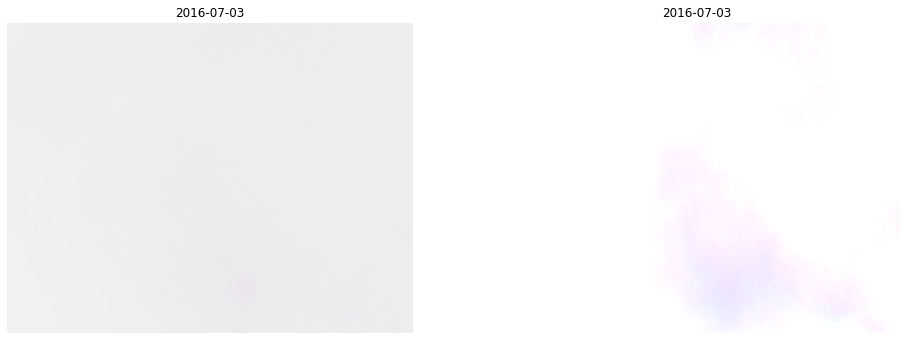

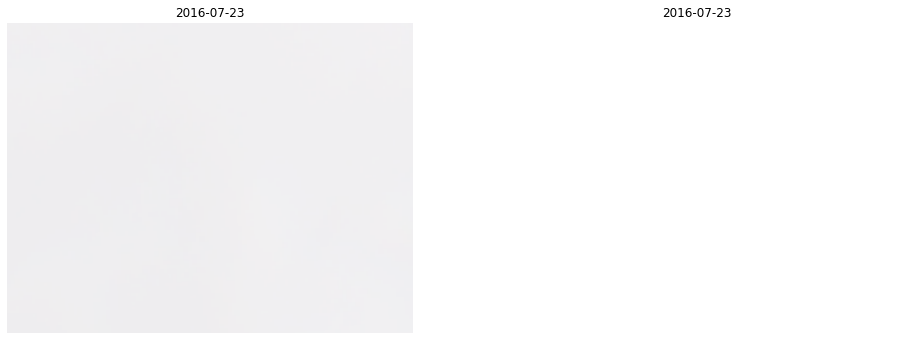

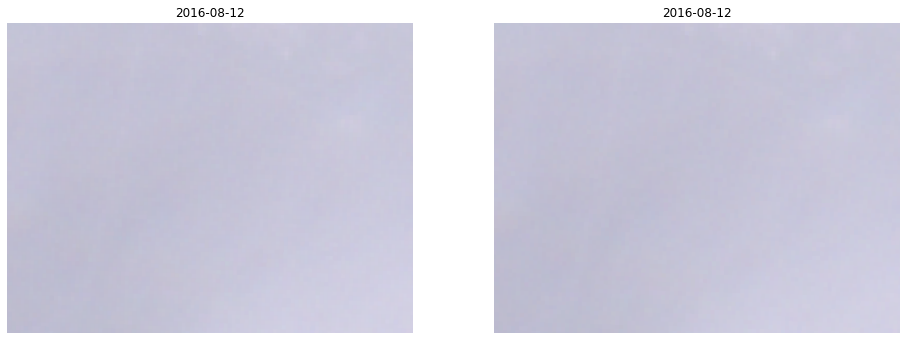

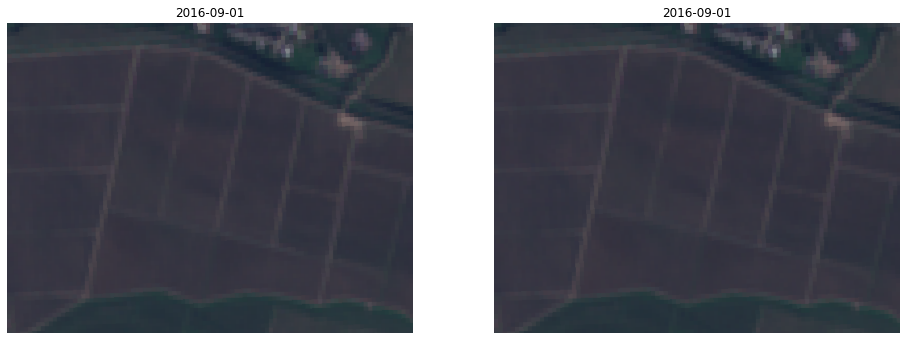

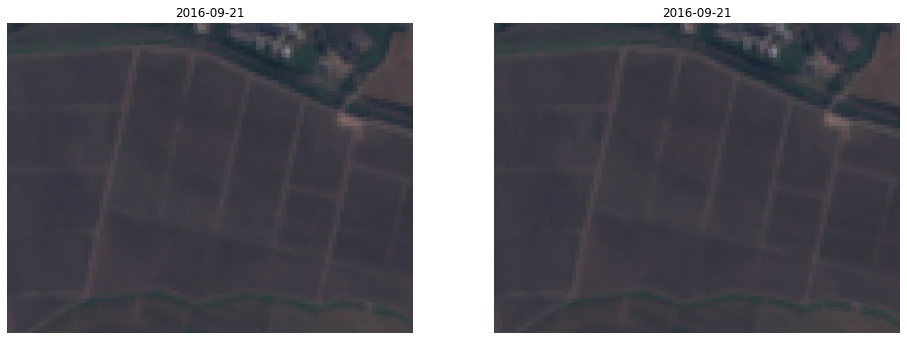

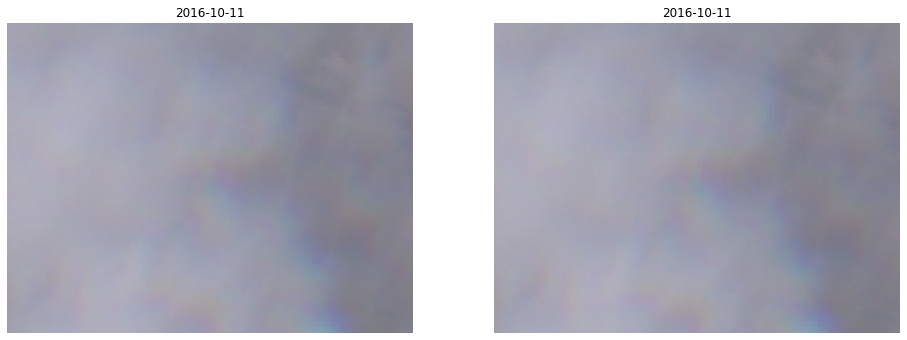

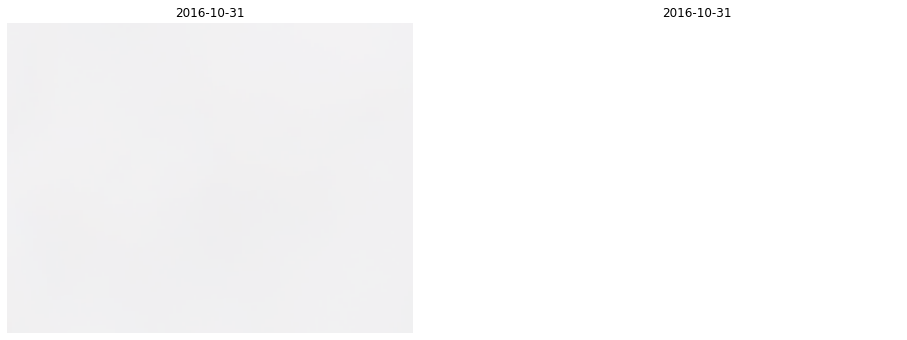

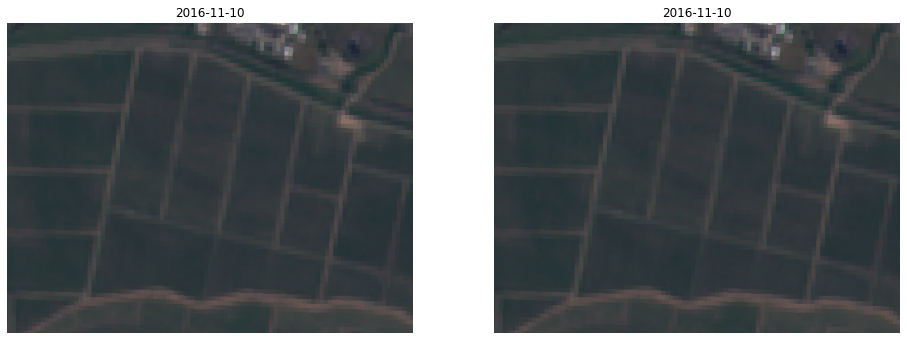

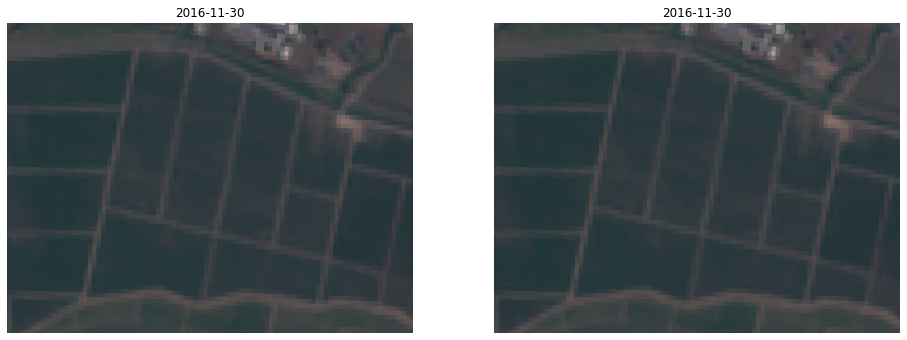

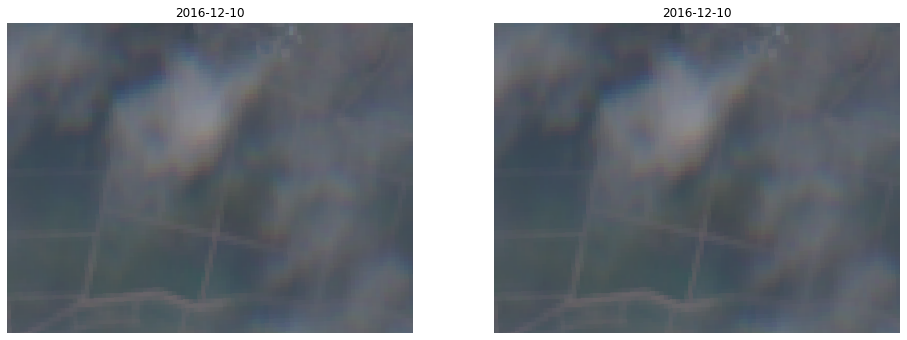

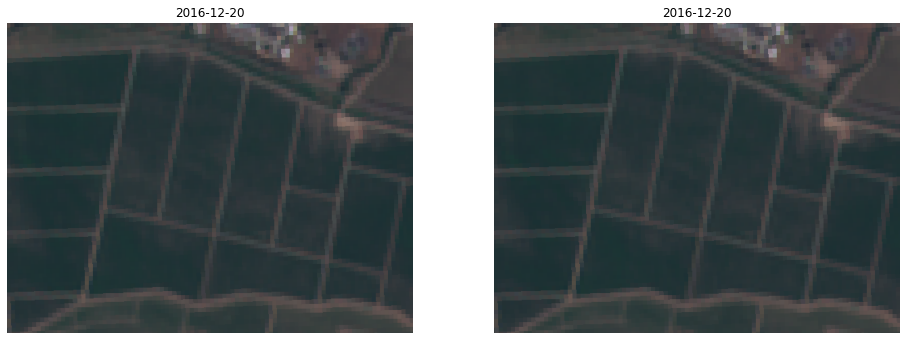

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import datetime
import numpy as np

import matplotlib.pyplot as plt
import os 
import json 

import cv2
import subprocess
import tifffile as tiff
from google.colab.patches import cv2_imshow

imagePlots=[]

for i in range(len(image_names)):
#for i in range(10):
  imagePlots.append(tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/'+talca_campo+'_SentinelL1C_'+dates_final[i]+'/'+talca_campo+'_'+dates_final[i]+'.tiff'))
  #print(imagePlots[0])
  #plt.imshow(imagePlots[0])

  R=tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/'+talca_campo+'_SentinelL1C_'+dates_final[i]+'/channels/channel4_'+talca_campo+'_'+dates_final[i]+'.tiff') #R
  G=tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/'+talca_campo+'_SentinelL1C_'+dates_final[i]+'/channels/channel3_'+talca_campo+'_'+dates_final[i]+'.tiff')#G
  B=tiff.imread('/content/gdrive/My Drive/WORK/C&T/SENTINEL-HUB/test_dir/SENTINEL_L1C/'+talca_campo+'_SentinelL1C_'+dates_final[i]+'/channels/channel2_'+talca_campo+'_'+dates_final[i]+'.tiff')#B

  RGB=np.zeros((458,600,3),'float')  #SOLO PARA CAMPO1
  #RGB=np.zeros((438,600,3),'float')   #SOLO PARA CAMPO2
  RGB[...,0]=R*2.5
  RGB[...,1]=G*2.5
  RGB[...,2]=B*2.5

  imagePlots.append(RGB)
  plt.figure(figsize=(16,16))
  for j, img in enumerate(imagePlots):
    plt.subplot(1, 2,j+1)
    plt.axis('off')
    plt.title(dates_final[i])
    plt.imshow(img)
  imagePlots=[]